# Edge detection
### Canny filter
### Morphological operator
## Tasks
* Try different thresholds for binarization (lena)
* Apply skeletonize, erosion to bin images (lena,camera)
* Apply canny filter (lena, camera)


### Binarization

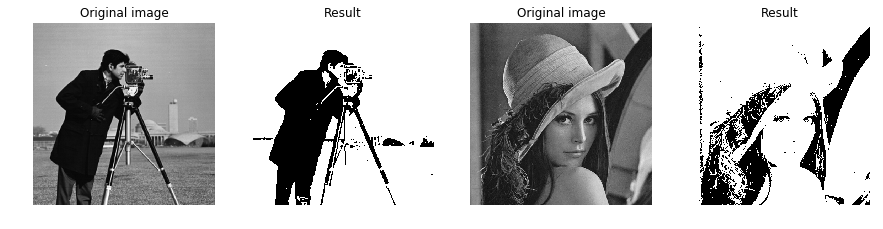

In [1]:
import numpy as np
from skimage import data
import matplotlib.pyplot as plt
import scipy.misc as simg
image = data.camera()
imlen = simg.imread('./lena_cover.jpg', mode='L')
#tt = np.median(image)
tt=64
ttl = 50
binary = image > tt
binaryLena = imlen > ttl
fig, axes = plt.subplots(ncols=4, figsize=(15, 10))

ax = axes.ravel()
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original image')
ax[1].imshow(binary, cmap=plt.cm.gray)
ax[1].set_title('Result')
ax[2].imshow(imlen, cmap=plt.cm.gray)
ax[2].set_title('Original image')
ax[3].imshow(binaryLena, cmap=plt.cm.gray)
ax[3].set_title('Result')
for a in ax:
    a.axis('off')
    
plt.show()

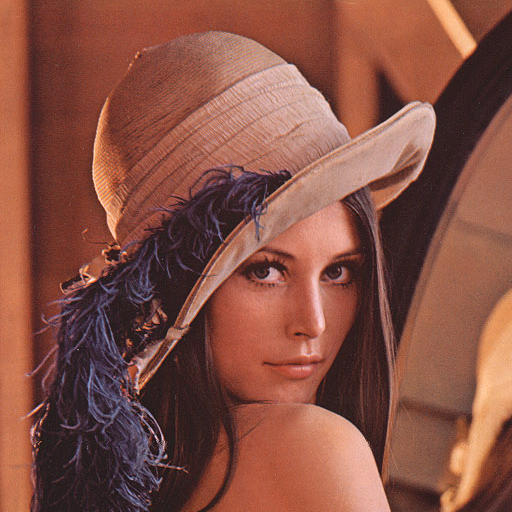

### Example of canny filter

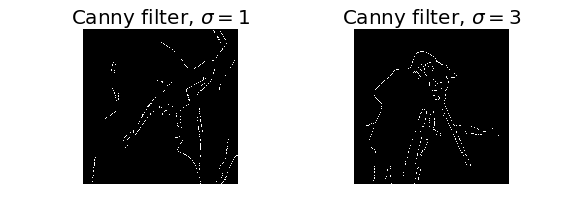

In [2]:
import numpy as np
from skimage import data
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage import feature
import scipy.misc as simg

# Generate noisy image of a square
im = np.zeros((128, 128))
im[32:-32, 32:-32] = 1

im = ndi.rotate(im, 15, mode='constant')
im = ndi.gaussian_filter(im, 4)
im += 0.2 * np.random.random(im.shape)

imman = data.camera()
imlen = simg.imread('./lena_cover.jpg', mode = 'L')
imlen = ndi.gaussian_filter(imlen, 4)
imman = ndi.gaussian_filter(imman, 4)

# Compute the Canny filter for two values of sigma
edges2 = feature.canny(im, sigma=3)
edglen = feature.canny(imlen)
edgman = feature.canny(imman, sigma = 3)


# display results
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3),
                                    sharex=True, sharey=True)

ax1.imshow(edglen, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('Canny filter, $\sigma=1$', fontsize=20)

ax2.imshow(edgman, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=3$', fontsize=20)

fig.tight_layout()

plt.show()

In [3]:
import os
import matplotlib.pyplot as plt
from skimage.data import data_dir
from skimage.util import img_as_ubyte
from skimage import io


def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax1.set_adjustable('box-forced')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    ax2.set_adjustable('box-forced')
    plt.show()

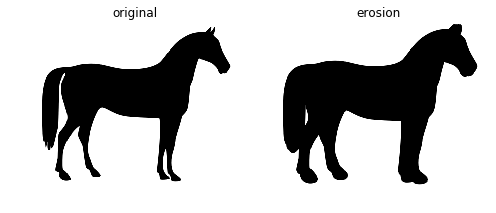

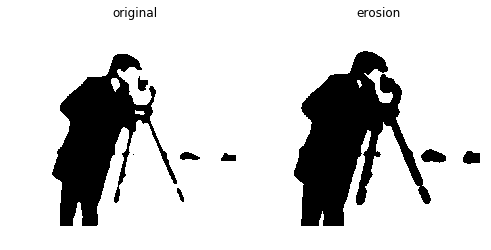

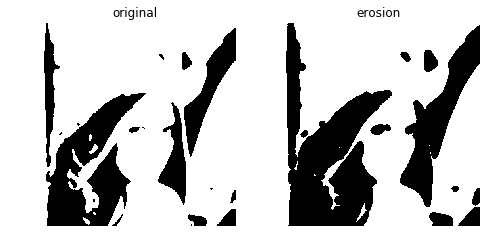

In [17]:
import os
from skimage import io
from skimage import data
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.morphology import disk
from skimage.morphology import erosion, dilation, opening, closing
import scipy.misc as simg
tt = 64
horse = io.imread(os.path.join(data_dir, "horse.png"), as_grey=True)
im = data.camera()
im = ndi.gaussian_filter(im, 4)
imlen = simg.imread('./lena_cover.jpg', mode = 'L')
imlen = ndi.gaussian_filter(imlen, 4)
im = im > tt
imlen = imlen > tt
selem = disk(6)
im2 = erosion(im, selem)
imlen2 = erosion(imlen, selem)
eroded = erosion(horse, selem)
plot_comparison(horse, eroded, 'erosion')
plot_comparison(im, im2, 'erosion')
plot_comparison(imlen, imlen2, 'erosion')

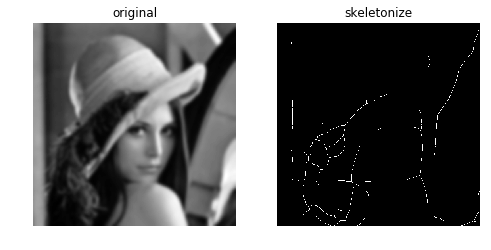

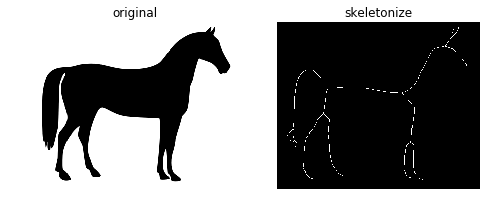

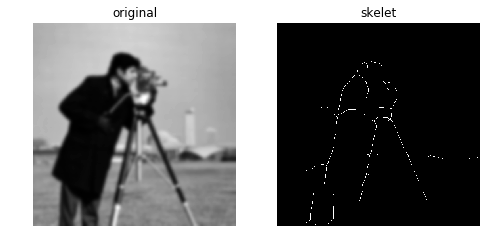

In [16]:
import numpy as np
import os
from skimage import io
from skimage import data
from skimage.data import data_dir
import matplotlib.pyplot as plt
from skimage.morphology import disk
from skimage.morphology import erosion, skeletonize, opening, closing
import scipy.misc as simg

imlen = simg.imread('./lena_cover.jpg', mode='L')
imlen = ndi.gaussian_filter(imlen, 4)
horse = io.imread(os.path.join(data_dir, "horse.png"), as_grey=True)
cameraMan = data.camera()
cameraMan = ndi.gaussian_filter(cameraMan, 4)
tt =64 # np.median(cameraMan)
ttl = 60 #np.median(imlen)
sc = cameraMan > tt
skLen = imlen > ttl
sc = skeletonize(sc == 0)
selem = disk(6)
sk = skeletonize(horse == 0)
skLen = skeletonize(skLen == 0)

plot_comparison(imlen, skLen, 'skeletonize')
plot_comparison(horse, sk, 'skeletonize')
plot_comparison(cameraMan, sc, 'skelet')